In [1]:
import pandas as pd

df = pd.DataFrame(data= {'name':['john', 'mary', 'peter','jeff','bill', 'lisa'], 'age':[23, 78, 22, 19, 45, 33],
                         'state': ['iowa', 'dc', 'california', 'texas', 'washington', 'dc'], 'num_children': [2, 2, 0, 1, 2, 1],
                        'num_pets' : [0, 4, 0, 5, 0, 0]})

df.columns

Index(['name', 'age', 'state', 'num_children', 'num_pets'], dtype='object')

In [2]:
df.loc[2:4, ['name']]

,name
2,peter
3,jeff
4,bill


In [3]:
df.iloc[-2:]

,name,age,state,num_children,num_pets
4,bill,45,washington,2,0
5,lisa,33,dc,1,0


In [4]:
df

,name,age,state,num_children,num_pets
0,john,23,iowa,2,0
1,mary,78,dc,2,4
2,peter,22,california,0,0
3,jeff,19,texas,1,5
4,bill,45,washington,2,0
5,lisa,33,dc,1,0


In [5]:
df[df['age'] > 30]

,name,age,state,num_children,num_pets
1,mary,78,dc,2,4
4,bill,45,washington,2,0
5,lisa,33,dc,1,0


In [6]:
df[df.age > 30]

,name,age,state,num_children,num_pets
1,mary,78,dc,2,4
4,bill,45,washington,2,0
5,lisa,33,dc,1,0


In [7]:
df[(df.age > 40) & (df.num_pets > 0)]

,name,age,state,num_children,num_pets
1,mary,78,dc,2,4


In [8]:
df[(df["age"] > 40) & (df["num_pets"] > 0)]

,name,age,state,num_children,num_pets
1,mary,78,dc,2,4


In [9]:
df[(df.age > 40) | (df.num_pets > 0)]

,name,age,state,num_children,num_pets
1,mary,78,dc,2,4
3,jeff,19,texas,1,5
4,bill,45,washington,2,0


In [10]:
dfdrop = df.drop(["age","num_children"],axis=1)
dfdrop

,name,state,num_pets
0,john,iowa,0
1,mary,dc,4
2,peter,california,0
3,jeff,texas,5
4,bill,washington,0
5,lisa,dc,0


In [11]:
df.describe()

,age,num_children,num_pets
count,6.000000,6.000000,6.000000
mean,36.666667,1.333333,1.500000
std,22.384518,0.816497,2.345208
min,19.000000,0.000000,0.000000
25%,22.250000,1.000000,0.000000
50%,28.000000,1.500000,0.000000
75%,42.000000,2.000000,3.000000
max,78.000000,2.000000,5.000000


In [12]:
import numpy as np
df[["age","num_pets","num_children"]].mean()
df[["age","num_pets","num_children"]].apply(lambda col: np.mean(col),axis=0)


age             36.666667
num_pets         1.500000
num_children     1.333333
dtype: float64

In [13]:
df[["age","num_pets","num_children"]].apply(lambda col: np.sum(col),axis=0)

age             220
num_pets          9
num_children      8
dtype: int64

In [14]:
df.sum()

name                    johnmarypeterjeffbilllisa
age                                           220
state           iowadccaliforniatexaswashingtondc
num_children                                    8
num_pets                                        9
dtype: object

In [15]:
df['age'] = df['age'].apply(lambda x: x*2)
df['age'] = df['age'].apply(lambda x: x/2)
df

,name,age,state,num_children,num_pets
0,john,23.0,iowa,2,0
1,mary,78.0,dc,2,4
2,peter,22.0,california,0,0
3,jeff,19.0,texas,1,5
4,bill,45.0,washington,2,0
5,lisa,33.0,dc,1,0


In [16]:
df['new c'] = df['age'] * df['num_children']
df

,name,age,state,num_children,num_pets,new c
0,john,23.0,iowa,2,0,46.0
1,mary,78.0,dc,2,4,156.0
2,peter,22.0,california,0,0,0.0
3,jeff,19.0,texas,1,5,19.0
4,bill,45.0,washington,2,0,90.0
5,lisa,33.0,dc,1,0,33.0


In [17]:
df.sort_values('age', ascending = False)

,name,age,state,num_children,num_pets,new c
1,mary,78.0,dc,2,4,156.0
4,bill,45.0,washington,2,0,90.0
5,lisa,33.0,dc,1,0,33.0
0,john,23.0,iowa,2,0,46.0
2,peter,22.0,california,0,0,0.0
3,jeff,19.0,texas,1,5,19.0


In [18]:
df[df.apply(lambda row: row['name'].startswith('j'), axis=1)]

,name,age,state,num_children,num_pets,new c
0,john,23.0,iowa,2,0,46.0
3,jeff,19.0,texas,1,5,19.0


In [19]:
from collections import OrderedDict
from pandas import DataFrame
import pandas as pd
import numpy as np

table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item1', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1$', '2$', '3$', '4$']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))
d = DataFrame(table)
p = d.pivot(index='Item', columns='CType', values='USD')
p1 = d.pivot(index='USD', columns='EU', values='USD')
p2 = d.pivot(index='Item', columns='USD', values='USD')

In [20]:
d

,Item,CType,USD,EU
0,Item0,Gold,1$,1€
1,Item0,Bronze,2$,2€
2,Item1,Gold,3$,3€
3,Item1,Silver,4$,4€


In [21]:
p

CType,Bronze,Gold,Silver
Item,,,
Item0,2$,1$,NaN
Item1,NaN,3$,4$


In [22]:
p1

EU,1€,2€,3€,4€
USD,,,,
1$,1$,NaN,NaN,NaN
2$,NaN,2$,NaN,NaN
3$,NaN,NaN,3$,NaN
4$,NaN,NaN,NaN,4$


In [23]:
p2

USD,1$,2$,3$,4$
Item,,,,
Item0,1$,2$,NaN,NaN
Item1,NaN,NaN,3$,4$


In [24]:
import numpy as np
import pandas as pd

df_tit = pd.read_csv('titanic.csv')

In [25]:
df_tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df_tit.shape

(891, 12)

In [27]:
import matplotlib.pyplot as plt

df_tit['Age'].hist(bins=80)
plt.show()

<Figure size 640x480 with 1 Axes>

In [28]:
print(80/16)

5.0


In [29]:
#how many age values are empty
df_tit['Age'].isna().sum()

177

In [30]:
# CREATE A NEW COLUMN AS GENDER, WHEN SEX IS F IT IS ZERO, MALE IS ONE
df_tit['Gender'] = df_tit['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [31]:
df_tit.shape

(891, 13)

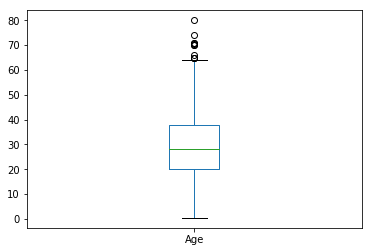

In [32]:
df_tit['Age'].plot.box()

In [33]:
#list of all ages that are not null
#.values on a pandas returns a numpy array, more efficient than pythons
df_tit['Age'].dropna().values

array([22.  , 38.  , 26.  , 35.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 31.  , 35.  ,
       34.  , 15.  , 28.  ,  8.  , 38.  , 19.  , 40.  , 66.  , 28.  ,
       42.  , 21.  , 18.  , 14.  , 40.  , 27.  ,  3.  , 19.  , 18.  ,
        7.  , 21.  , 49.  , 29.  , 65.  , 21.  , 28.5 ,  5.  , 11.  ,
       22.  , 38.  , 45.  ,  4.  , 29.  , 19.  , 17.  , 26.  , 32.  ,
       16.  , 21.  , 26.  , 32.  , 25.  ,  0.83, 30.  , 22.  , 29.  ,
       28.  , 17.  , 33.  , 16.  , 23.  , 24.  , 29.  , 20.  , 46.  ,
       26.  , 59.  , 71.  , 23.  , 34.  , 34.  , 28.  , 21.  , 33.  ,
       37.  , 28.  , 21.  , 38.  , 47.  , 14.5 , 22.  , 20.  , 17.  ,
       21.  , 70.5 , 29.  , 24.  ,  2.  , 21.  , 32.5 , 32.5 , 54.  ,
       12.  , 24.  , 45.  , 33.  , 20.  , 47.  , 29.  , 25.  , 23.  ,
       19.  , 37.  , 16.  , 24.  , 22.  , 24.  , 19.  , 18.  , 19.  ,
       27.  ,  9.  , 36.5 , 42.  , 51.  , 22.  , 55.5 , 40.5 , 51.  ,
       16.  , 30.  ,

In [34]:
df_tit[df_tit['Embarked'] == 'C'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1


In [35]:
# Plot the age range for those who embarked form 'C'
df_c = df_tit[df_tit['Embarked'] == 'C']

In [36]:
df_c.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1


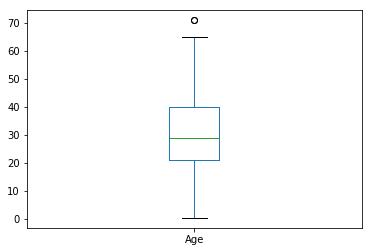

In [37]:
df_c['Age'].plot.box()

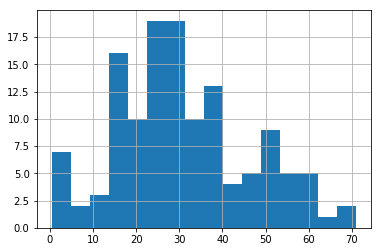

In [38]:
df_c['Age'].hist(bins=16)
plt.show()

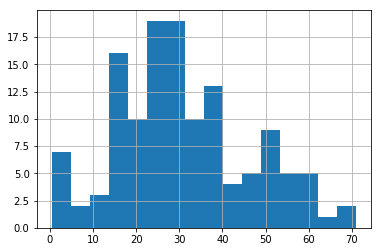

In [39]:
df_tit[df_tit['Embarked'] == 'C']['Age'].hist(bins=16)
plt.show()

In [40]:
df_tit['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [41]:
df_tit['Embarked'].nunique()

3

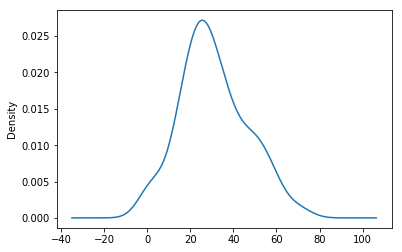

In [42]:
df_tit[df_tit['Embarked'] == 'C']['Age'].plot(kind='kde')

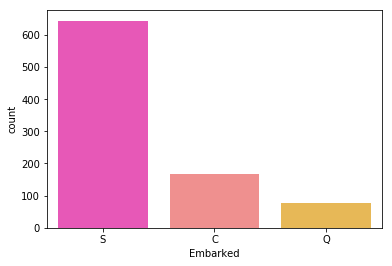

In [43]:
import seaborn as sns
sns.countplot(x="Embarked", palette="spring", data=df_tit)

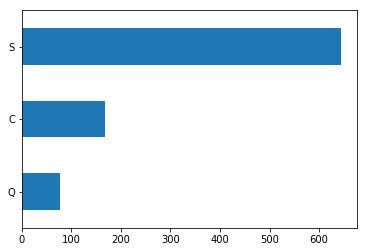

In [44]:
df_tit['Embarked'].value_counts().plot('barh').invert_yaxis()


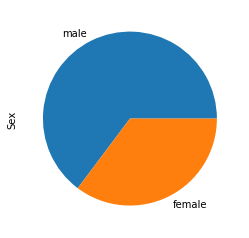

In [45]:
df_tit['Sex'].value_counts().plot(kind='pie')

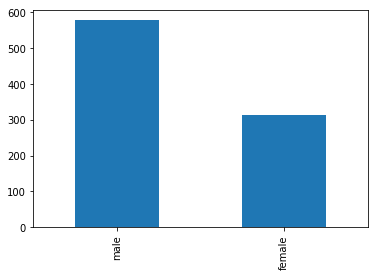

In [46]:

df_tit['Sex'].value_counts().plot(kind='bar')

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

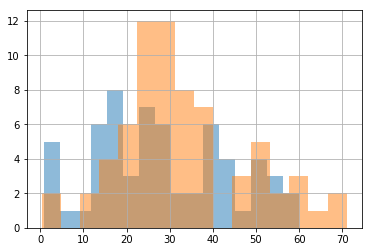

In [47]:
df_tit[df_tit['Embarked'] == 'C'].groupby('Sex')['Age'].hist(bins=16, alpha = .5)
# modify this to include legend

In [48]:
df = df_tit

In [49]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].agg(np.max)

Sex
female    60.0
male      71.0
Name: Age, dtype: float64

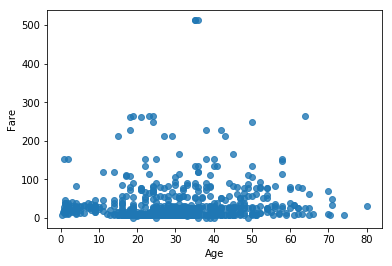

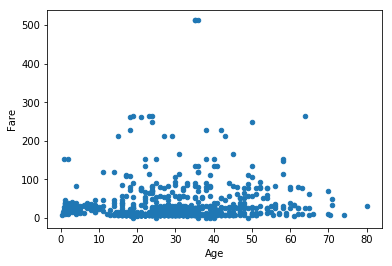

In [50]:
sns.regplot(x="Age", y="Fare", fit_reg=False, data=df)
df.plot.scatter(x="Age", y="Fare")

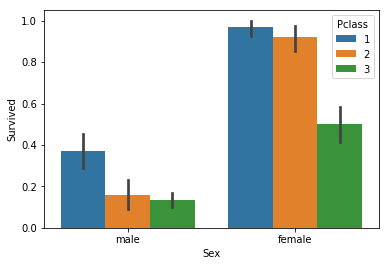

In [58]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df)

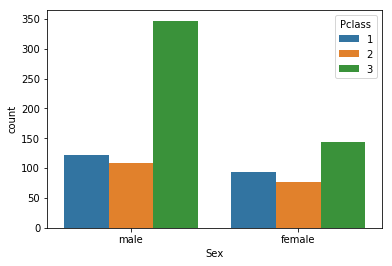

In [106]:
sns.countplot(x="Sex", hue="Pclass", data=df)

In [56]:
<div class="girk">
df|</div><i class="fa fa-lightbulb-o "></i>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


In [80]:
(df[(df['Sex'] == 'female') & (df['Pclass'] == 1) & (df['Survived'] == 1)]).value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [66]:
len(df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]

94

In [71]:
91/94

0.9680851063829787

In [96]:
df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]['Survived'].value_counts()

1    91
0     3
Name: Survived, dtype: int64

In [83]:
df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]['Survived']

1      1
3      1
11     1
31     1
52     1
61     1
88     1
136    1
151    1
166    1
177    0
194    1
195    1
215    1
218    1
230    1
256    1
257    1
258    1
268    1
269    1
275    1
290    1
291    1
297    0
299    1
306    1
307    1
309    1
310    1
      ..
591    1
609    1
627    1
641    1
669    1
689    1
700    1
708    1
710    1
716    1
730    1
742    1
759    1
763    1
765    1
779    1
781    1
796    1
809    1
820    1
829    1
835    1
842    1
849    1
853    1
856    1
862    1
871    1
879    1
887    1
Name: Survived, Length: 94, dtype: int64

In [87]:
arr

array([91,  3])

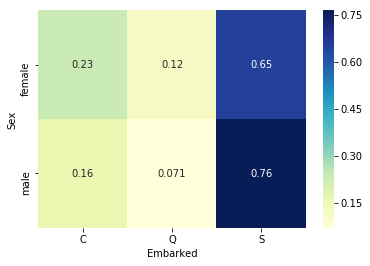

In [90]:
sns.heatmap(pd.crosstab(df['Sex'], df['Embarked'], normalize='index'), cmap="YlGnBu", annot=True)

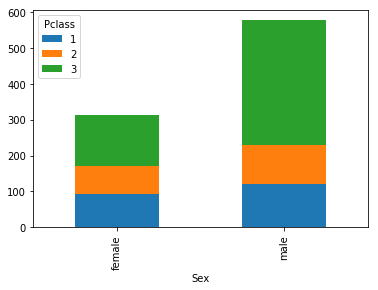

In [101]:
df.groupby(['Sex'])['Pclass'].value_counts().unstack().plot(kind='bar',stacked=True)

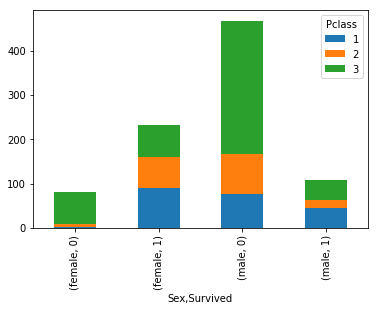

In [102]:
df.groupby(['Sex', 'Survived'])['Pclass'].value_counts().unstack().plot(kind='bar',stacked=True)

In [103]:
# df.groupby(['Sex'])['Pclass'].value_counts().unstack()
# the above and crosstab are the same
pd.crosstab(df['Sex'], df['Pclass'])

pd.crosstab(df['Sex'], df['Survived'])

pd.crosstab(df['Sex'], df['Embarked'])

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441
